In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
import sklearn.linear_model as linr
import sklearn.model_selection as model_selection
import numpy as np

%matplotlib inline 

In [2]:
target_dir=pathlib.Path("/media/mjsobrep/43CDA61E672B9161/pose/")
results=pd.read_csv(target_dir/"ss_ch.csv")

In [3]:
results

,Unnamed: 0,subject,side,bbt,age,convex_hull,arm_length,norm_convex_hull
0,0,23,R,-2.561644,4,<scipy.spatial.qhull.ConvexHull object at 0x7f...,276.305789,0.355603
1,1,23,L,-2.561644,4,<scipy.spatial.qhull.ConvexHull object at 0x7f...,273.391793,0.324625
2,2,23,R,-2.561644,4,<scipy.spatial.qhull.ConvexHull object at 0x7f...,1400.678772,0.034215
3,3,23,L,-2.561644,4,<scipy.spatial.qhull.ConvexHull object at 0x7f...,940.832840,0.104810
4,4,44,R,-10.169811,7,<scipy.spatial.qhull.ConvexHull object at 0x7f...,433.546605,0.043604
...,...,...,...,...,...,...,...,...
83,83,20,L,-1.408451,81,<scipy.spatial.qhull.ConvexHull object at 0x7f...,785.249072,0.306640
84,84,25,R,-0.704225,76,<scipy.spatial.qhull.ConvexHull object at 0x7f...,463.183695,0.500460
85,85,25,L,-0.704225,76,<scipy.spatial.qhull.ConvexHull object at 0x7f...,472.666067,0.268890
86,86,25,R,-0.704225,76,<scipy.spatial.qhull.ConvexHull object at 0x7f...,473.042567,0.310624


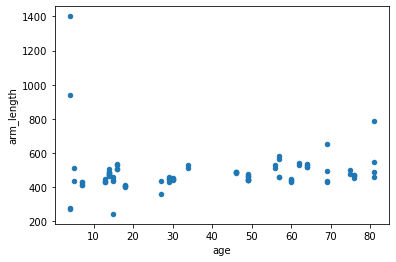

In [4]:
results.plot("age", "arm_length", "scatter")

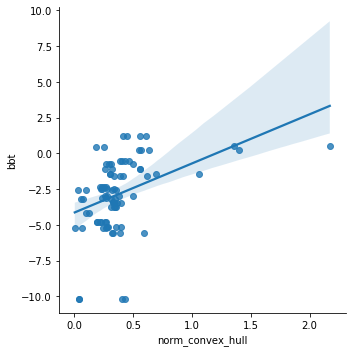

In [5]:
sns.lmplot(x='norm_convex_hull',y='bbt',data=results,fit_reg=True) 

In [6]:
bbt_vals=results['bbt'].values.reshape(-1,1)
ch_vals=results['norm_convex_hull'].values.reshape(-1,1)

In [7]:
reg=linr.LinearRegression().fit(ch_vals,bbt_vals)
print(f'bbt z-score={reg.coef_}*norm_convex_hull + {reg.intercept_} || R^2={reg.score(ch_vals,bbt_vals)}')

bbt z-score=[[3.44090517]]*norm_convex_hull + [-4.1441708] || R^2=0.1697549950121151


In [8]:
lm = linr.LinearRegression()
cv = model_selection.LeaveOneOut().split(results) # leave one out doesn't work for linear regression with r^2
scores = model_selection.cross_val_score(lm,  ch_vals,bbt_vals, scoring='neg_mean_absolute_error', cv=cv)
print(f'MAE: {np.mean(np.absolute(scores))}')

MAE: 1.7338698380189295


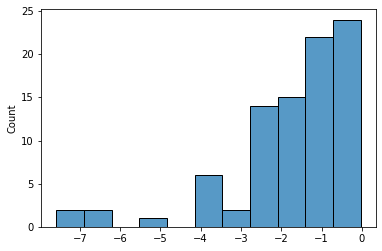

In [9]:
sns.histplot(scores)